# Métodos Lineares: Regressão - Aula 1

In [1]:
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from pytest import approx
from ipywidgets import interactive

In [2]:
# Configura o estilo e tamanho dos gráficos.

sns.set_style("whitegrid")
sns.set_palette("Purples_r")
plt.rcParams.update({
    'font.size': 14,
    'figure.figsize': (12, 8)
})

## Carrega dados e exibe informações básicas

O dataset que mais utilizaremos fica armazenado na variável `imoveis_df`.

In [3]:
imoveis_df = pd.read_csv("dataset_imoveis.csv")
print(imoveis_df.shape)
print(imoveis_df.columns)
imoveis_df.head()

(21613, 17)
Index(['id', 'data', 'preco_dolares', 'quartos', 'banheiros', 'area_util_m2',
       'area_total_m2', 'andares', 'orla_mar', 'nota_vista', 'nota_condicao',
       'nota', 'area_porao_m2', 'ano_construcao', 'ano_reforma', 'tem_porao',
       'teve_reforma'],
      dtype='object')


,id,data,preco_dolares,quartos,banheiros,area_util_m2,area_total_m2,andares,orla_mar,nota_vista,nota_condicao,nota,area_porao_m2,ano_construcao,ano_reforma,tem_porao,teve_reforma
0,7129300520,2014-10-13,221900,3,1,109.625587,524.902176,1.0,0,0,3,7,0.000000,1955,0,0,0
1,6414100192,2014-12-09,538000,3,3,238.760813,672.803816,2.0,0,0,3,7,37.161216,1951,1991,1,1
2,5631500400,2015-02-25,180000,2,1,71.535341,929.030400,1.0,0,0,3,6,0.000000,1933,0,0,0
3,2487200875,2014-12-09,604000,4,3,182.089958,464.515200,1.0,0,0,5,7,84.541766,1965,0,1,0
4,1954400510,2015-02-18,510000,3,2,156.077107,750.656563,1.0,0,0,3,8,0.000000,1987,0,0,0


## Exploração e treinamento de modelos

Visualização de duas variáveis numéricas (scatterplot).

<AxesSubplot:title={'center':'Area Util (m2) x Preço (US$)'}, xlabel='area_util_m2', ylabel='preco_dolares'>

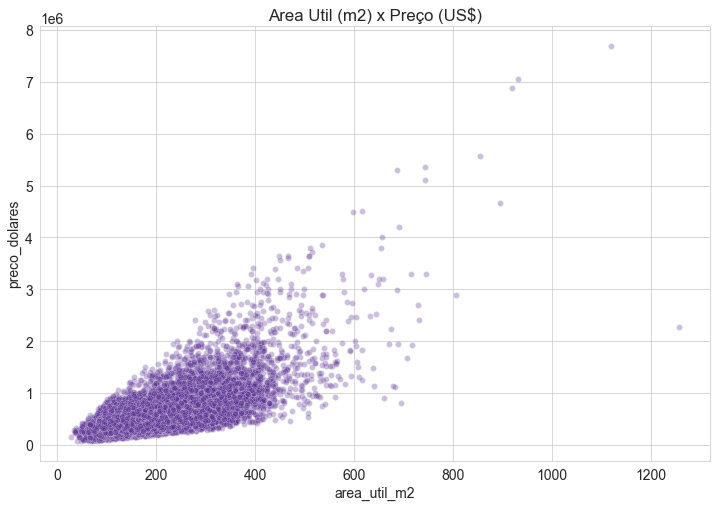

In [4]:
plt.title("Area Util (m2) x Preço (US$)")
sns.scatterplot(data=imoveis_df, x='area_util_m2', y='preco_dolares', alpha=0.3)

Na célula abaixo é treinado o primeiro modelo, uma regressão linear simples. Usamos a variável preditora `area_util_m2` para prever a variável de resposta `preco_dolares`.

Para mais exemplos de como utilizar essa sintaxe de formulas escritas do `statsmodels`, você pode consultar a própria documentação do pacote [pacote](https://www.statsmodels.org/dev/example_formulas.html) ou essa [documentação](https://patsy.readthedocs.io/en/latest/overview.html).


In [5]:
rl_simples = smf.ols(formula='preco_dolares ~ area_util_m2', data=imoveis_df).fit()
print(rl_simples.summary())

                            OLS Regression Results                            
Dep. Variable:          preco_dolares   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Mon, 26 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:12:52   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -4.358e+04   4402.690     -9.899   

Aqui nós fazemos duas predições e as utilizamos para traçar a reta que representa graficamente o modelo.

In [6]:
X_rl_simples = np.array([0, 1300])

predicoes_rl_simples = rl_simples.predict(
    pd.DataFrame(X_rl_simples.reshape((2, 1)), columns=['area_util_m2'])
)

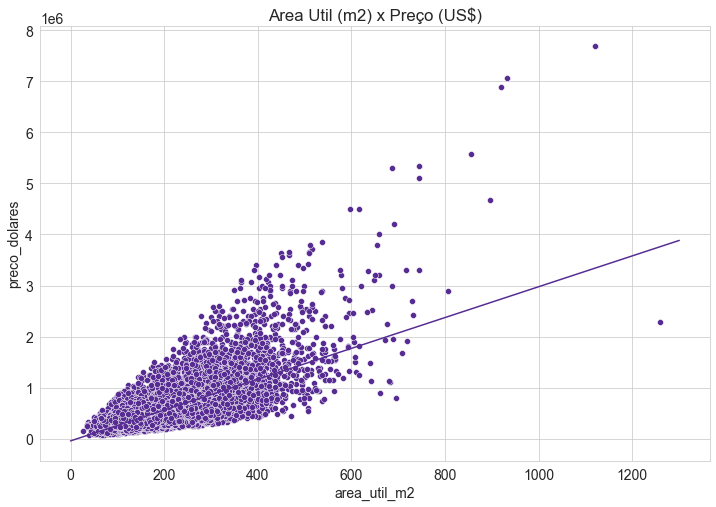

In [7]:
plt.title("Area Util (m2) x Preço (US$)")
sns.scatterplot(data=imoveis_df, x='area_util_m2', y='preco_dolares', ci=None)
plt.plot(X_rl_simples, predicoes_rl_simples, '-')

Nessa célula criaremos um novo dataset chamado `relacoes_df`, esse dataset contém dados sintéticos (artificiais), e tem o intuito de mostrar a relação não linear de algumas transformações.

Note que cada vez que você rodar essa celula, o gráfico será um pouco diferente, pois em cada variável estamos adicionando [ruído branco](https://pt.wikipedia.org/wiki/Ru%C3%ADdo_branco).

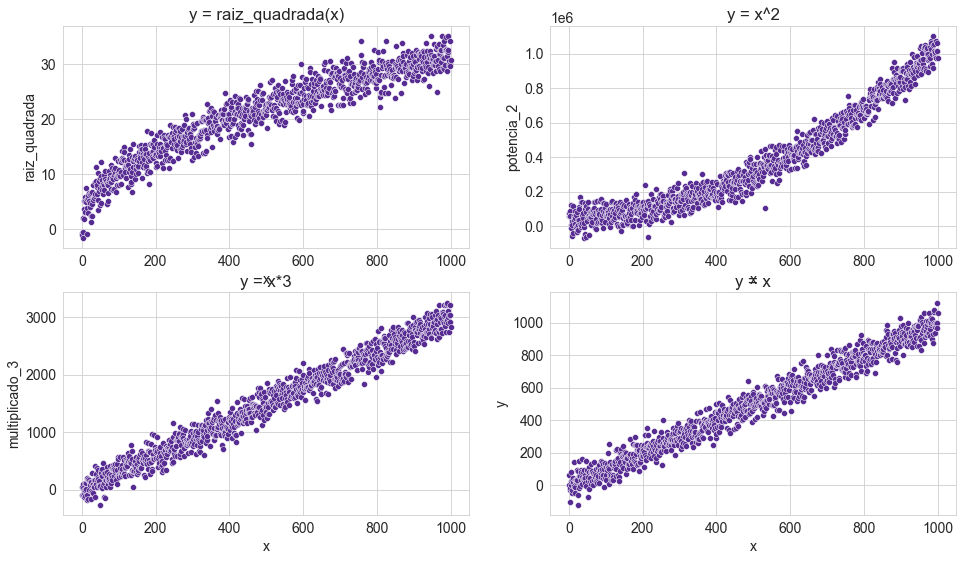

In [8]:
relacoes_df = pd.DataFrame({'x': np.linspace(0, 1000, 1000)})

relacoes_df = relacoes_df.assign(**{
    'raiz_quadrada': np.sqrt(relacoes_df['x']) + np.random.normal(0, 2, size=1000),
    'potencia_2': relacoes_df['x'] ** 2 + np.random.normal(50000, 50000, size=1000),
    'multiplicado_3': relacoes_df['x'] * 3 + np.random.normal(0, 150, size=1000),
    'y': relacoes_df['x'] + np.random.normal(0, 50, size=1000)
})

fig = plt.figure(figsize=(16, 9))

ax = fig.add_subplot(2, 2, 1)
plt.title('y = raiz_quadrada(x)')
sns.scatterplot(x='x', y='raiz_quadrada', data=relacoes_df, ax=ax)

ax = fig.add_subplot(2, 2, 2)
plt.title('y = x^2')
sns.scatterplot(x='x', y='potencia_2', data=relacoes_df, ax=ax)

ax = fig.add_subplot(2, 2, 3)
plt.title('y = x*3')
sns.scatterplot(x='x', y='multiplicado_3', data=relacoes_df, ax=ax)

ax = fig.add_subplot(2, 2, 4)
plt.title('y = x')
sns.scatterplot(x='x', y='y', data=relacoes_df, ax=ax)

plt.show()

Aqui geramos a representação gráfica interativa do modelo de regressão linear simples, você pode alterar os parâmetros e ver a reta atualizando em tempo real (ou quase, tem um pouco de delay).

In [9]:
def regressao_linear_interativa(beta_0, beta_1):
    x = np.linspace(0, 500, 100)

    plt.figure(figsize=(10, 7))
    plt.title('Regressão Linear Interativa')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.plot(x, beta_0 + beta_1 * x)
    plt.ylim(-6000, 6000)
    plt.show()

plot_interativo = interactive(
    regressao_linear_interativa, 
    beta_0=(-2500, 2500), 
    beta_1=(-12, 12)
)
plot_interativo

interactive(children=(IntSlider(value=0, description='beta_0', max=2500, min=-2500), IntSlider(value=0, descri…

Aqui treinamos a primeira regressão linear múltipla usando as variáveis `area_util_m2` e `andares` para prever `preco_dolares`.

In [10]:
rl_multipla = smf.ols('preco_dolares ~ area_util_m2 + andares', data=imoveis_df).fit()
print(rl_multipla.summary())

                            OLS Regression Results                            
Dep. Variable:          preco_dolares   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 1.050e+04
Date:                Mon, 26 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:13:10   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21610   BIC:                         6.006e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -5.044e+04   5775.171     -8.733   

Abaixo usamos o modelo treinado acima para fazer predições com dados novos arbitrários.

In [11]:
rl_multipla.predict(pd.DataFrame([
    [0, 0],
    [10, 10],
    [30, 1],
    [50, 2],
    [120, 4],
    [100000, 0]
], columns=['area_util_m2', 'andares']))

0   -5.043605e+04
1    4.420794e+04
2    4.620643e+04
3    1.127875e+05
4    3.361339e+05
5    3.005636e+08
dtype: float64

Aqui treinamos o mesmo modelo que o anteior com o acréscimo da variável preditora `quartos`.

In [12]:
rl_multipla_2 = smf.ols(
    'preco_dolares ~ area_util_m2 + andares + quartos', 
    data=imoveis_df
).fit()
print(rl_multipla_2.summary())

                            OLS Regression Results                            
Dep. Variable:          preco_dolares   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     7402.
Date:                Mon, 26 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:13:12   Log-Likelihood:            -2.9997e+05
No. Observations:               21613   AIC:                         5.999e+05
Df Residuals:                   21609   BIC:                         6.000e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     7.586e+04   7658.046      9.905   

E novamente fazemos predições com dados novos.

In [13]:
rl_multipla_2.predict(pd.DataFrame([
    [0, 0, 0],
    [10, 10, -5],
    [30, 1, 3],
    [50, 2, 3],
    [120, 4, 6],
    [100000, 0, 100]
], columns=['area_util_m2', 'andares', 'quartos']))

0    7.585613e+04
1    4.268988e+05
2    9.284624e+03
3    7.995539e+04
4    1.514857e+05
5    3.315323e+08
dtype: float64

## Desafios!

Abaixo você vai poder tentar implementar sua própria regressão linear simples! Remova os comentários indicados e implemente o que está sendo pedido, depois teste seu código na célula abaixo.

----

Função de custo: 

$ e_i^2 = (y_i - \hat{y}_i)^2 $

----

Soma dos resíduos quadrados (RSS):

$ RSS = e_1^2 + e_2^2 + ... + e_n^2 = \sum_{i=1}^n e_i^2 $

----

Método dos mínimos quadrados:

$ \bar{y} = \frac{\sum_{i=1}^n{y_i}}{n} $

$ \bar{x} = \frac{\sum_{i=1}^n{x_i}}{n} $

$ \beta_1 = \frac{\sum_{i=1}^{n}{(x_i - \bar{x})(y_i - \bar{y})}}
{\sum_{i=1}^n{(x_i - \bar{x})^2}}, $

$ \beta_0 = \bar{y} - \beta_1{\bar{x}} $

----

In [ ]:
class RegressaoSimples():
    def __init__(self):
        self.dados = None
        self.coluna_preditora = None
        self.coluna_resposta = None
        self.beta_0 = None
        self.beta_1 = None

    def treino(self, dados, coluna_preditora, coluna_resposta):
        # dados: DataFrame pandas
        # coluna_preditora: string do nome da coluna da variável de predição
        # coluna_resposta: string do nome da coluna da variável de resposta
        #
        # atualize o valor de self.dados, self.coluna_preditora e 
        # self.coluna_resposta
        #
        # implemente o treino do modelo e no final, atualize o valor dos 
        # parâmetros da regressão: self.beta_0 e self.beta_1
        #
        # OBS: nenhuma das outras funções deve ser rodada antes do treino.
        pass

    def predicao(self, x):
        # x: pode ser um número, uma numpy array ou uma pandas Series.
        # OBS: todos esses três tipos podem ser implementados com uma única 
        # expressão.
        #
        # implemente e retorne a predicao usando self.beta_0 e self.beta_1.
        pass

    def soma_residuos_quadrados(self):
        # implemente e retorne a soma dos resíduos quadrados usando os dados de 
        # treino (self.dados), além de self.coluna_preditora, 
        # self.coluna_resposta e self.predicao.
        pass
    

Cheque se seu resultado está correto rodando a célula abaixo. Caso você receba a mensagem `Sem erros! Parabéns`, você conseguiu implementar tudo com sucesso!

In [ ]:
meu_modelo = RegressaoSimples()
meu_modelo.treino(imoveis_df, 'area_util_m2', 'preco_dolares')

# Testes para garantir corretude.
assert meu_modelo.beta_1 == approx(3020.60693, rel=1e-3), \
    "O valor do beta_1 está incorreto."
assert meu_modelo.beta_0 == approx(-43580.7403, rel=1e-3), \
    "O valor do beta_0 está incorreto."
assert meu_modelo.predicao(30) == approx(47037.4676, rel=1e-3), \
    "Predição incorreta." 
assert meu_modelo.predicao(np.array([50, 200])) == approx(
    np.array([107449.6062, 560540.6460]), rel=1e-3
), "Predição incorreta."
assert meu_modelo.soma_residuos_quadrados() == approx(
    1477276367091591.0, rel=1e-3
), "Soma dos resíduos quadrados incorreto."

print('Sem erros! Parabéns')

### [SPOILER] Solução do desafio

Caso esteja tendo dificuldades, você pode consultar uma das possíveis soluções na célula abaixo.

In [ ]:
class RegressaoSimples():
    def __init__(self):
        self.dados = None
        self.coluna_preditora = None
        self.coluna_resposta = None
        self.beta_0 = None
        self.beta_1 = None

    def treino(self, dados, coluna_preditora, coluna_resposta):
        self.dados = dados
        self.coluna_preditora = coluna_preditora
        self.coluna_resposta = coluna_resposta

        media_y = np.mean(dados[coluna_resposta])
        media_x = np.mean(dados[coluna_preditora])

        numerador = ((dados[coluna_preditora] - media_x) * \
                     (dados[coluna_resposta] - media_y)).sum()
        denominador = ((dados[coluna_preditora] - media_x) ** 2).sum()

        self.beta_1 = numerador / denominador
        self.beta_0 = media_y - self.beta_1 * media_x

        return self

    def predicao(self, x):
        return self.beta_0 + self.beta_1 * x

    def soma_residuos_quadrados(self):
        predicoes = self.predicao(self.dados[self.coluna_preditora])
        return ((self.dados[self.coluna_resposta] - predicoes)**2).sum()
    